In [56]:
#import necessary modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Import necessary libraries**

In [57]:
# Load the dataset
df = pd.read_csv('/kaggle/input/dose-of-data/pokemon.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics for numeric columns
print(df.describe())

                     abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1      

**Load Dataset**

In [58]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64


**Check for missing values**

In [59]:
object_columns = df.select_dtypes(include=['object']).columns
print(df[object_columns].head())

                     abilities capture_rate   classfication     japanese_name  \
0  ['Overgrow', 'Chlorophyll']           45    Seed Pokémon  Fushigidaneフシギダネ   
1  ['Overgrow', 'Chlorophyll']           45    Seed Pokémon   Fushigisouフシギソウ   
2  ['Overgrow', 'Chlorophyll']           45    Seed Pokémon  Fushigibanaフシギバナ   
3     ['Blaze', 'Solar Power']           45  Lizard Pokémon      Hitokageヒトカゲ   
4     ['Blaze', 'Solar Power']           45   Flame Pokémon       Lizardoリザード   

         name  type1   type2  
0   Bulbasaur  grass  poison  
1     Ivysaur  grass  poison  
2    Venusaur  grass  poison  
3  Charmander   fire     NaN  
4  Charmeleon   fire     NaN  


**Inspect the object columns to understand their structure**

In [60]:
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return []

df['abilities'] = df['abilities'].apply(safe_literal_eval)

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column] = df[column].fillna(df[column].median())

non_scalar_columns = ['abilities']

for column in df.select_dtypes(include=['object']).columns:
    if column not in non_scalar_columns:
        df[column] = df[column].fillna(df[column].mode()[0])

print("Data Cleaning Completed Successfully!")

Data Cleaning Completed Successfully!


**Data Cleaning**

This code snippet focuses on cleaning and preparing data in a Pokémon dataset. It begins by defining a function safe_literal_eval to safely evaluate string representations of lists, particularly used to convert the 'abilities' column from strings to lists. Then, missing values in numeric columns are filled with the median value of each column, ensuring that the central tendency of the data is maintained. Following this, missing values in categorical columns, except for 'abilities', are filled with the mode (most frequent value), preserving the integrity of categorical data. Finally, the snippet concludes by printing a message confirming the successful completion of the data cleaning process, providing assurance that the dataset is now ready for further analysis.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

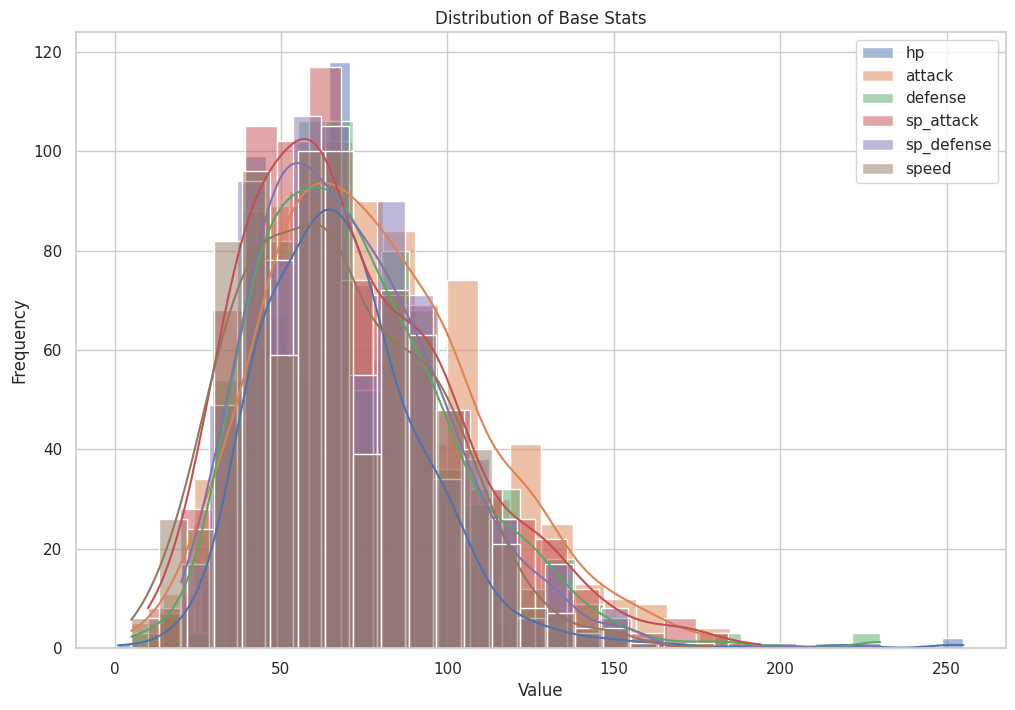

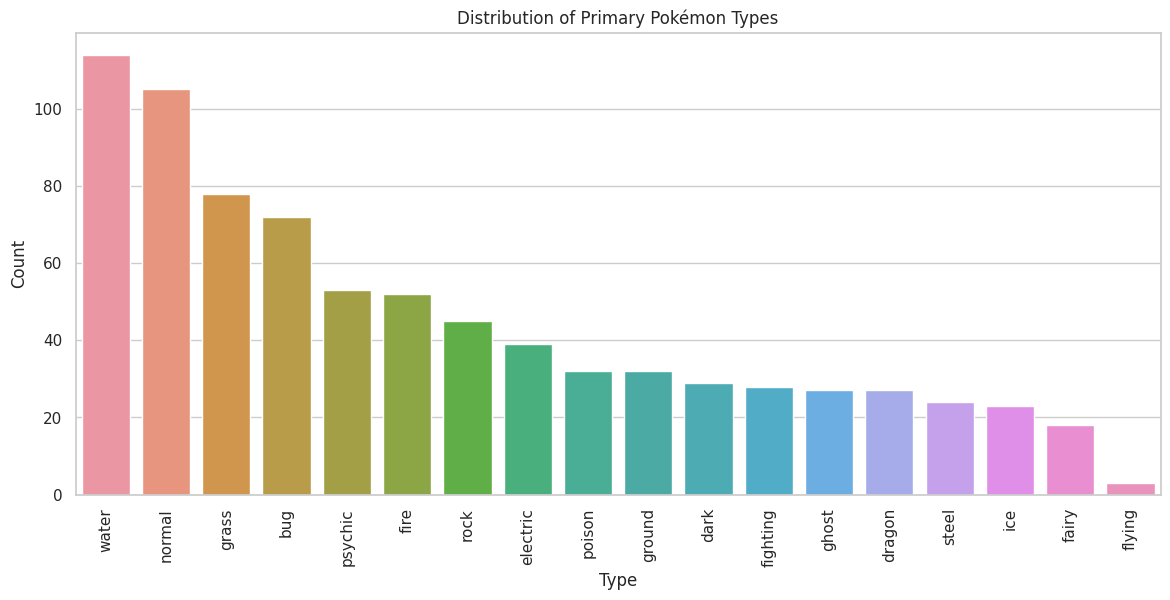

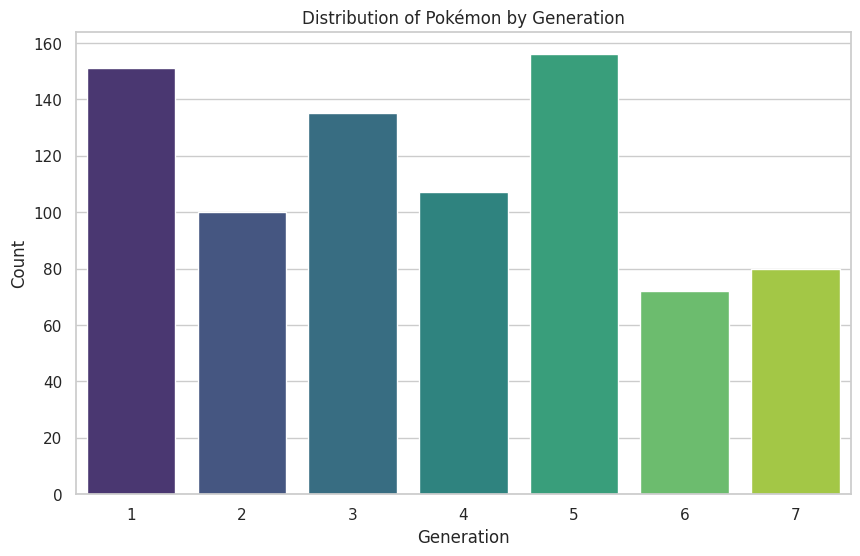

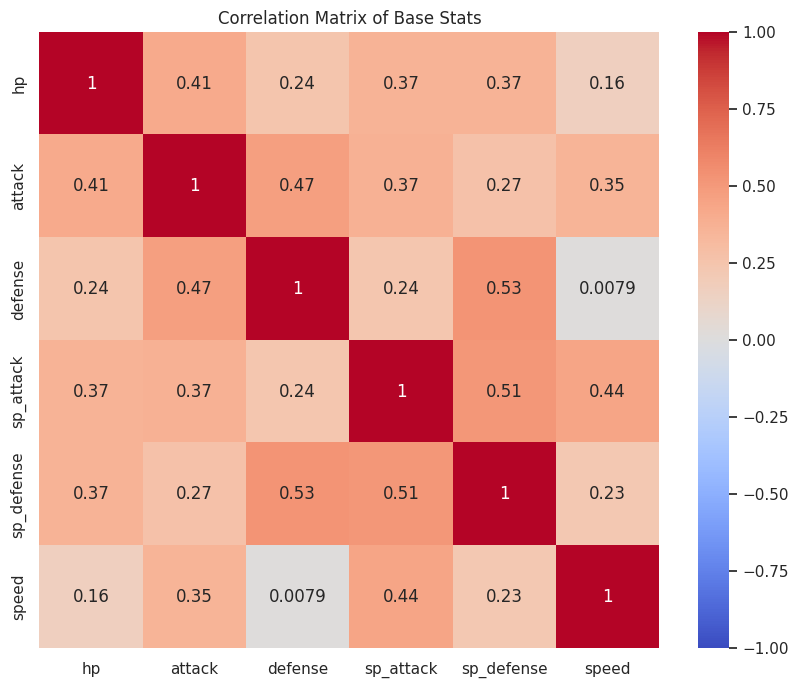

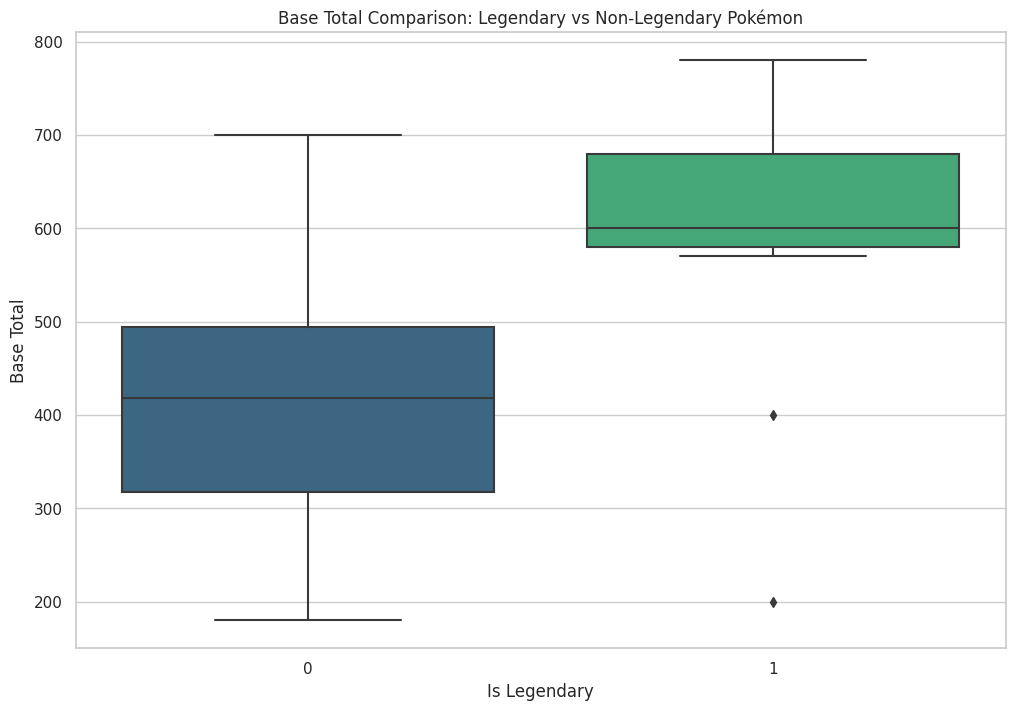

In [61]:
# Set style for the plots
sns.set(style='whitegrid')

# Plot distribution of base stats
base_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

plt.figure(figsize=(12, 8))
for stat in base_stats:
    sns.histplot(df[stat], kde=True, label=stat)
plt.legend()
plt.title('Distribution of Base Stats')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Pokémon types
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='type1', order=df['type1'].value_counts().index)
plt.title('Distribution of Primary Pokémon Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot distribution of generations
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='generation', palette='viridis')
plt.title('Distribution of Pokémon by Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()

# Correlation matrix for base stats
plt.figure(figsize=(10, 8))
corr_matrix = df[base_stats].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Base Stats')
plt.show()

# Compare base stats between legendary and non-legendary Pokémon
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='is_legendary', y='base_total', palette='viridis')
plt.title('Base Total Comparison: Legendary vs Non-Legendary Pokémon')
plt.xlabel('Is Legendary')
plt.ylabel('Base Total')
plt.show()

This code snippet utilizes seaborn to create multiple plots visualizing various aspects of the Pokémon dataset. Firstly, it sets the style for the plots to 'whitegrid'. Next, it creates a histogram for the distribution of base stats such as HP, attack, defense, etc., with each stat represented as a separate subplot. Following this, it generates a count plot to illustrate the distribution of primary Pokémon types, ordered by their frequency. Another count plot is then created to display the distribution of Pokémon across different generations, using a color palette to differentiate between generations. A correlation matrix heatmap is produced to visualize the correlation between different base stats, helping identify any relationships or patterns among them. Lastly, a boxplot compares the base total between legendary and non-legendary Pokémon, providing insights into potential differences in overall strength between these categories. Overall, these plots offer valuable insights into the distribution, relationships, and characteristics of Pokémon attributes within the dataset.

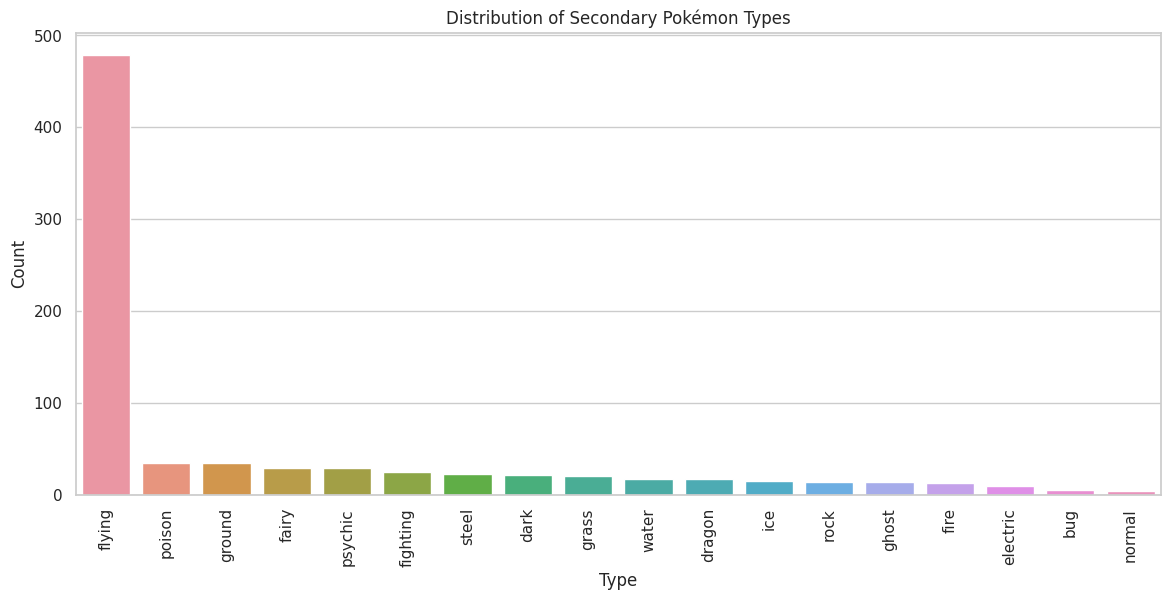

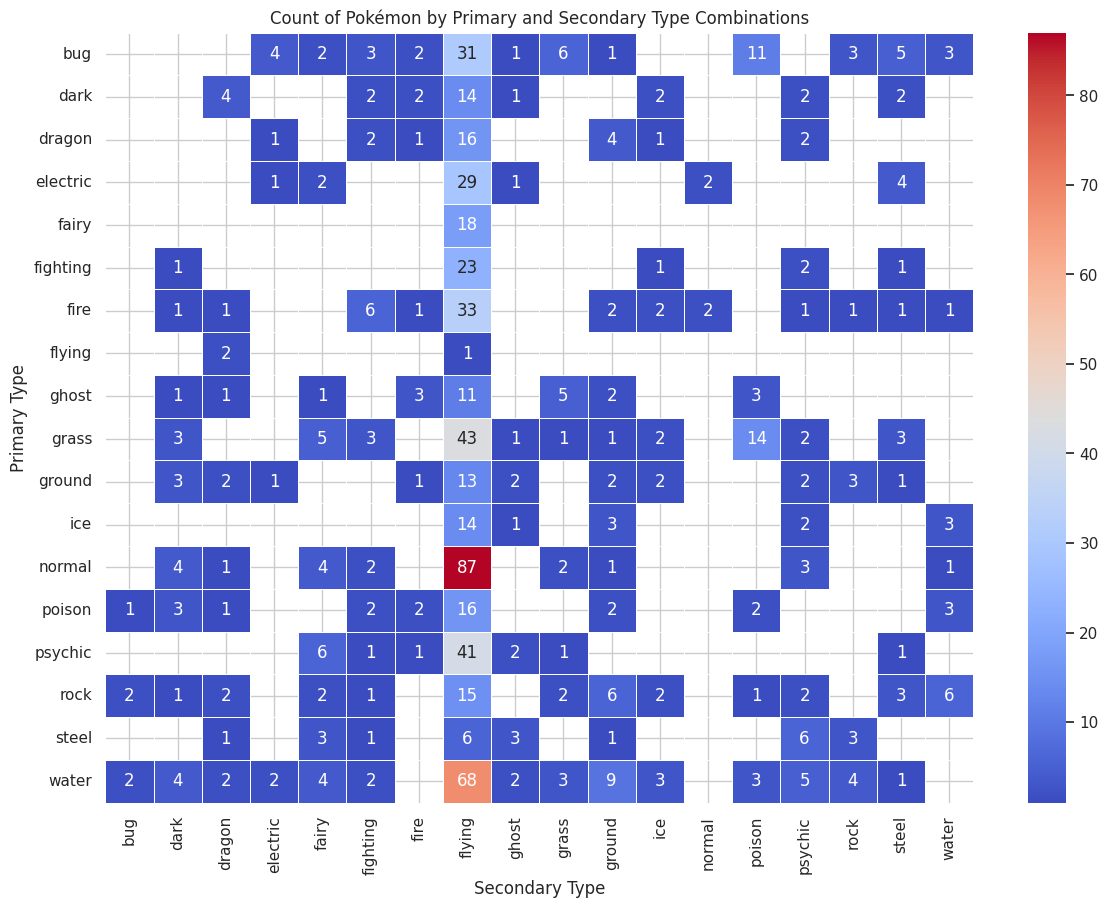

In [62]:
# Count of Pokémon by primary and secondary type
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='type2', order=df['type2'].value_counts().index)
plt.title('Distribution of Secondary Pokémon Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Count of Pokémon by primary and secondary type combinations
plt.figure(figsize=(14, 10))
type_combinations = df.groupby(['type1', 'type2']).size().reset_index(name='count')
type_combinations_pivot = type_combinations.pivot(index="type1", columns="type2", values="count")
sns.heatmap(type_combinations_pivot, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Count of Pokémon by Primary and Secondary Type Combinations')
plt.xlabel('Secondary Type')
plt.ylabel('Primary Type')
plt.show()

**Analysis of Pokémon Types**

This code snippet creates two visualizations related to Pokémon types. The first plot is a count plot showing the distribution of secondary Pokémon types, while the second plot is a heatmap displaying the count of Pokémon by primary and secondary type combinations. These visualizations provide insights into the distribution and combinations of Pokémon types within the dataset.

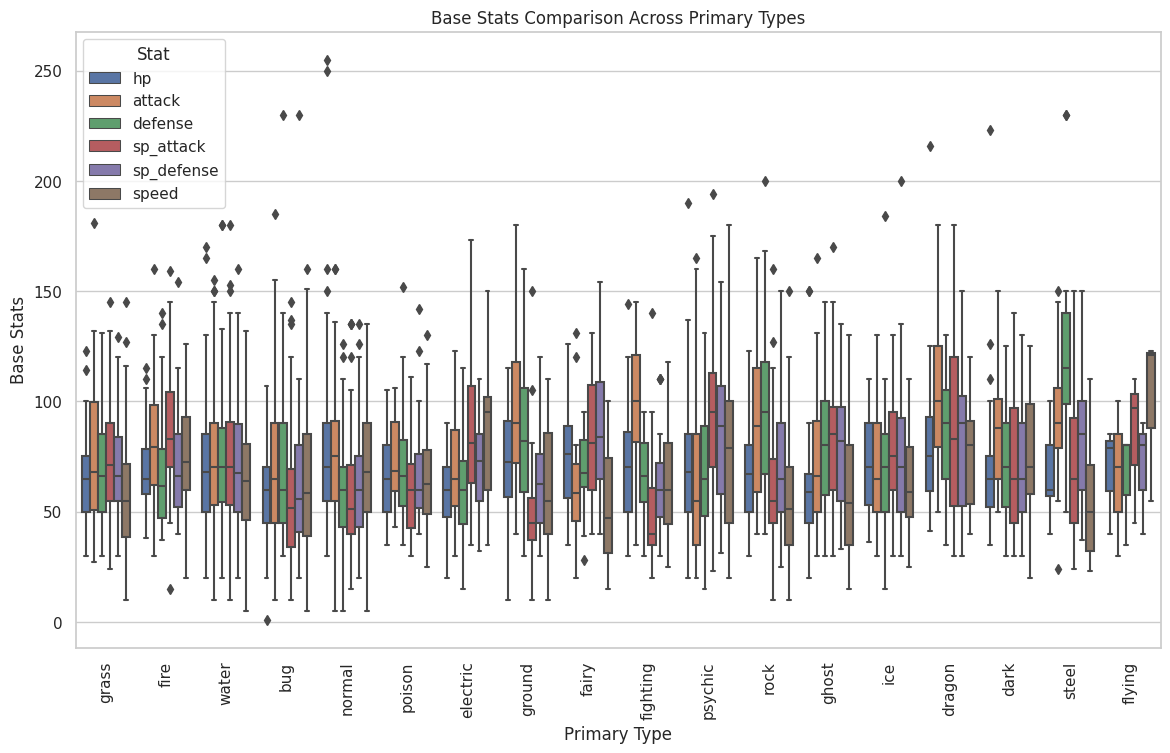

In [63]:
# Compare base stats across different primary types
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.melt(id_vars=['type1'], value_vars=base_stats), x='type1', y='value', hue='variable')
plt.title('Base Stats Comparison Across Primary Types')
plt.xlabel('Primary Type')
plt.ylabel('Base Stats')
plt.xticks(rotation=90)
plt.legend(title='Stat')
plt.show()

**Base Stats Analysis by Type**

This code snippet generates a boxplot comparison of base stats across different primary Pokémon types. It illustrates the distribution of base stats such as HP, attack, defense, etc., grouped by primary Pokémon type, providing insights into how base stats vary across different Pokémon types within the dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

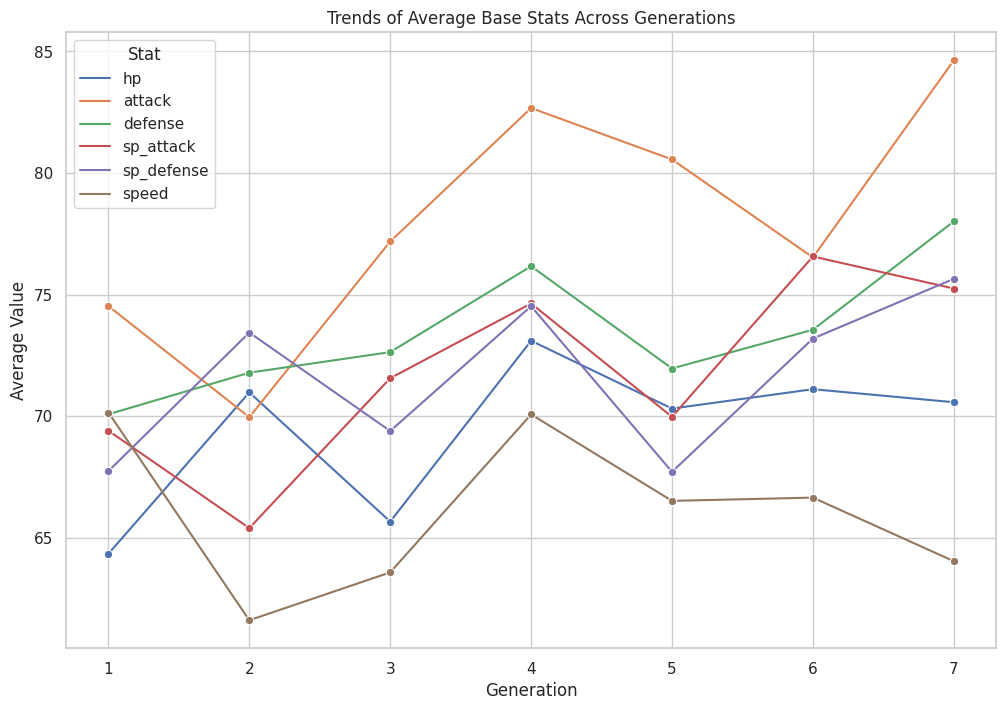

In [14]:
# Analyze how the average base stats have changed across different generations
plt.figure(figsize=(12, 8))
generation_stats = df.groupby('generation')[base_stats].mean().reset_index()
generation_stats = generation_stats.melt(id_vars='generation', value_vars=base_stats, var_name='Stat', value_name='Average Value')
sns.lineplot(data=generation_stats, x='generation', y='Average Value', hue='Stat', marker='o')
plt.title('Trends of Average Base Stats Across Generations')
plt.xlabel('Generation')
plt.ylabel('Average Value')
plt.legend(title='Stat')
plt.show()

**Trends Across Generations**

This code snippet visualizes the trends of average base stats across different Pokémon generations. It utilizes a line plot to display how the average values of base stats like HP, attack, defense, etc., have changed over successive generations. The x-axis represents the Pokémon generation, while the y-axis indicates the average value of the base stat. Each base stat is depicted by a distinct line on the plot, facilitating easy comparison of trends over generations. The plot provides insights into how the average base stats have evolved throughout the different stages of Pokémon games.

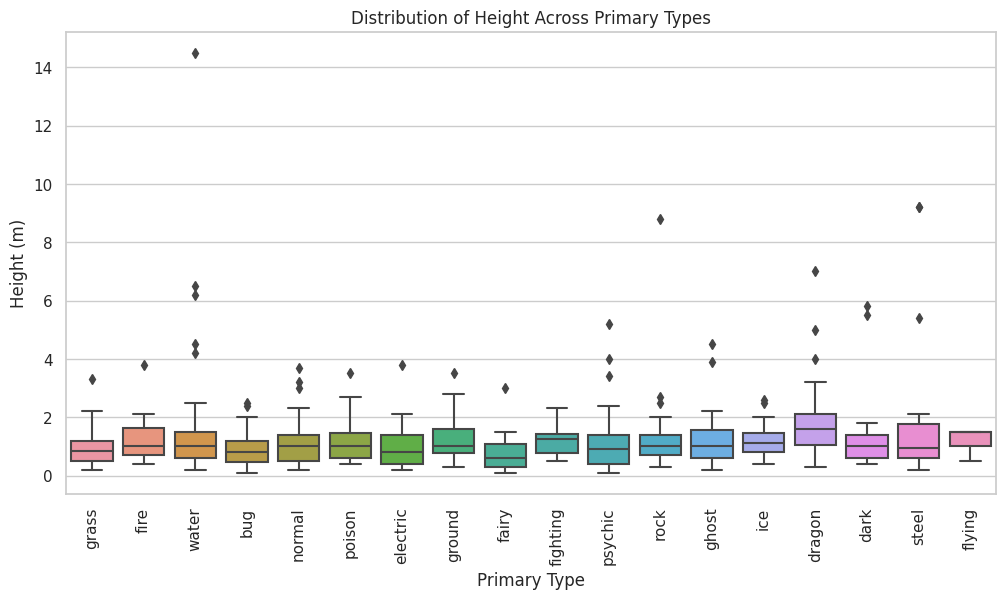

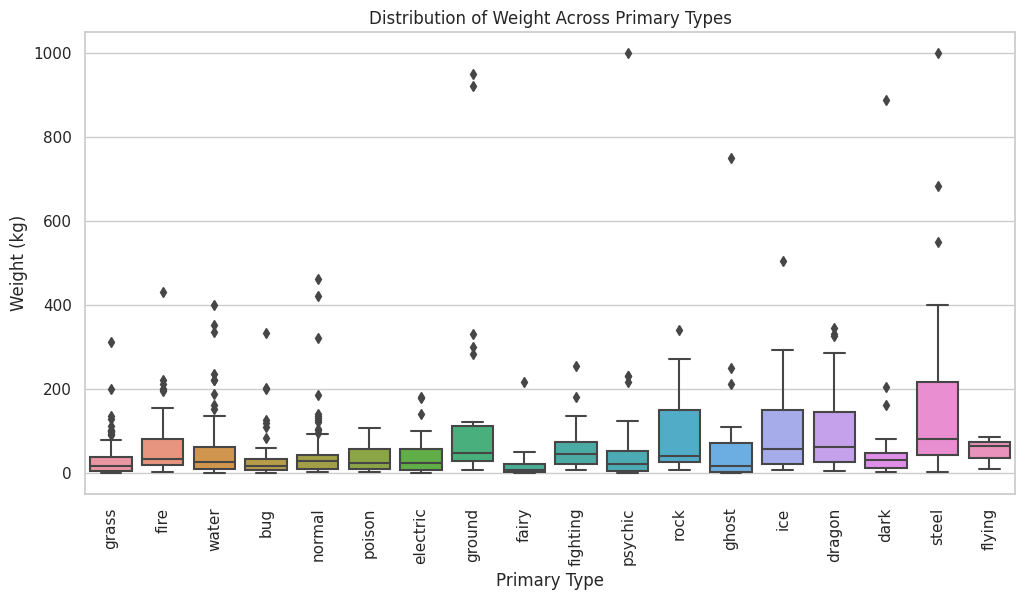

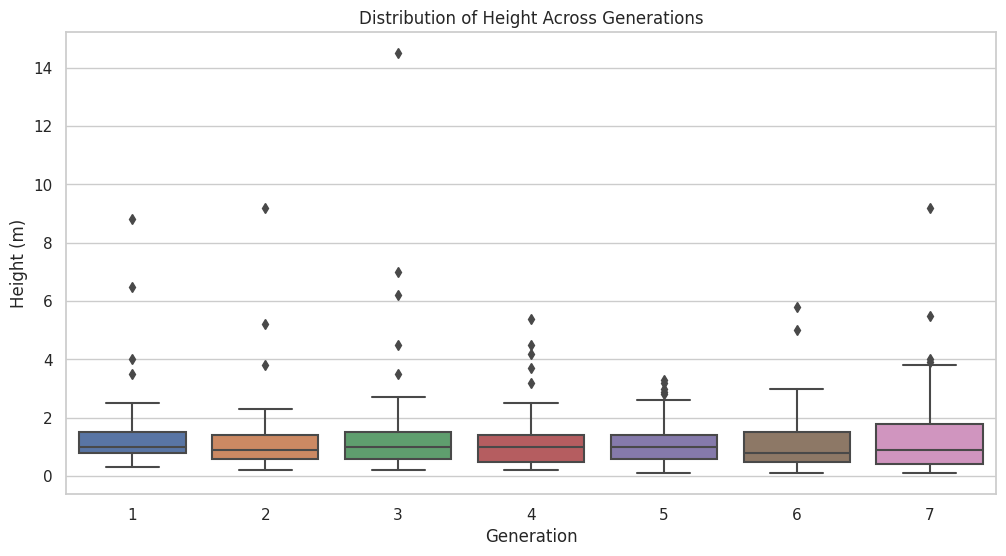

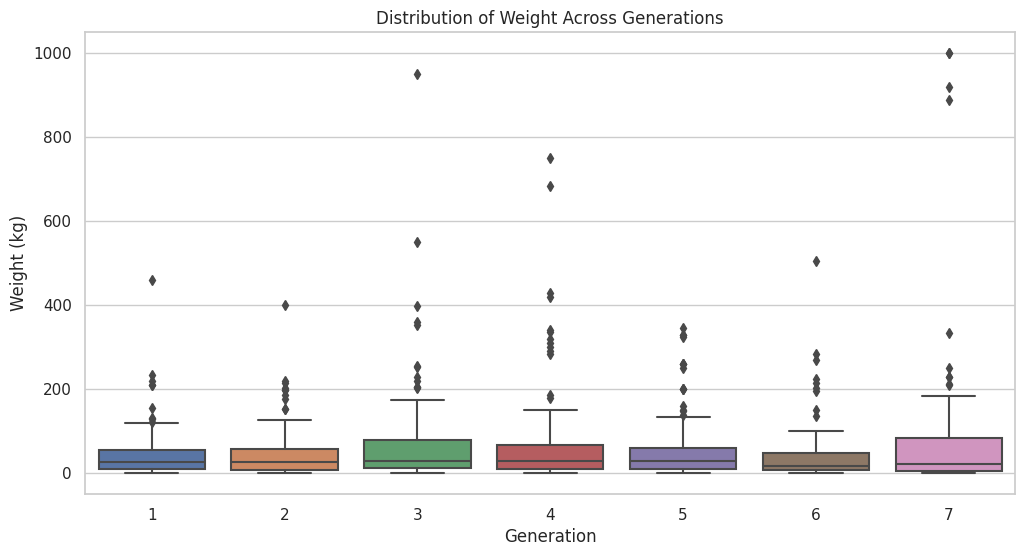

In [15]:
# Visualize the distribution of height and weight across different types and generations
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type1', y='height_m')
plt.title('Distribution of Height Across Primary Types')
plt.xlabel('Primary Type')
plt.ylabel('Height (m)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type1', y='weight_kg')
plt.title('Distribution of Weight Across Primary Types')
plt.xlabel('Primary Type')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='generation', y='height_m')
plt.title('Distribution of Height Across Generations')
plt.xlabel('Generation')
plt.ylabel('Height (m)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='generation', y='weight_kg')
plt.title('Distribution of Weight Across Generations')
plt.xlabel('Generation')
plt.ylabel('Weight (kg)')
plt.show()

**Height and Weight Analysis**


This code snippet visualizes the distribution of height and weight across different Pokémon types and generations. It utilizes seaborn's boxplot function to create four separate plots. The first two plots display the distribution of height and weight across primary Pokémon types. The following two plots illustrate the distribution of height and weight across Pokémon generations. Each plot includes labeled x and y axes, with titles indicating the distribution being visualized. These visualizations offer insights into how height and weight vary among Pokémon types and across different generations.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


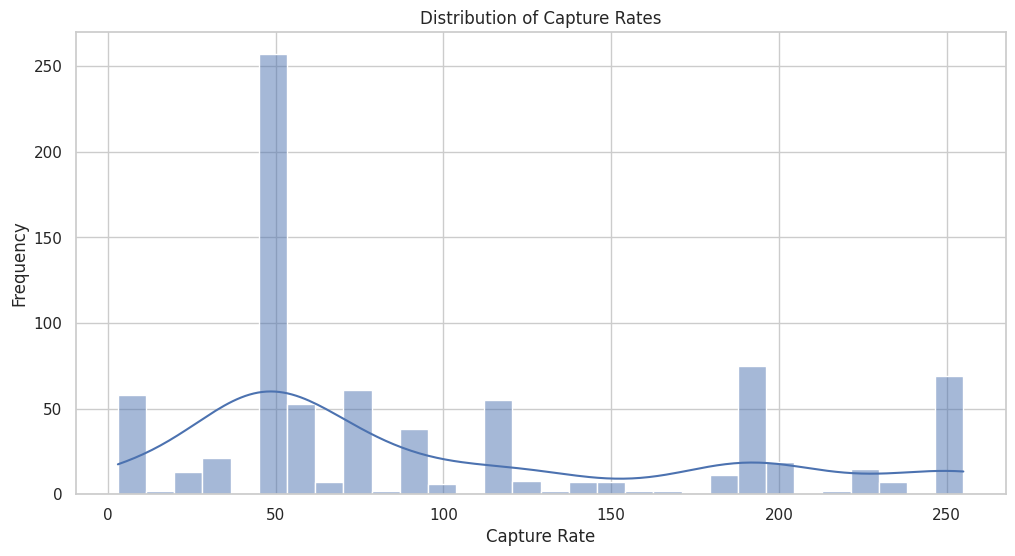

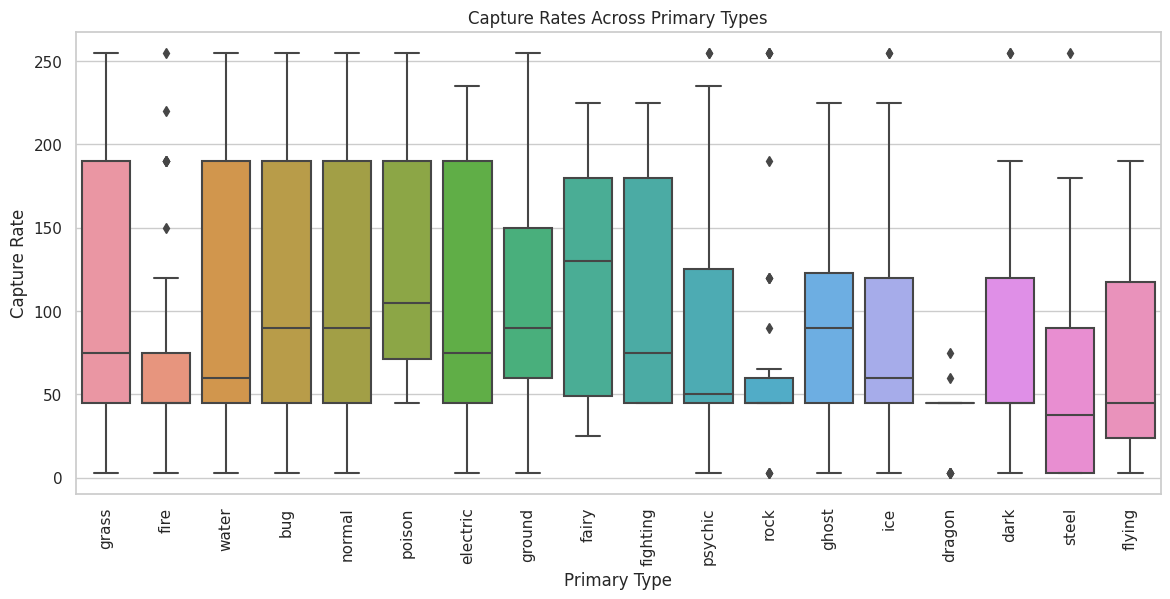

In [17]:
df['capture_rate'] = pd.to_numeric(df['capture_rate'], errors='coerce')

# Distribution of capture rates
plt.figure(figsize=(12, 6))
sns.histplot(df['capture_rate'].dropna(), bins=30, kde=True)
plt.title('Distribution of Capture Rates')
plt.xlabel('Capture Rate')
plt.ylabel('Frequency')
plt.show()

# Capture rates by type
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='type1', y='capture_rate')
plt.title('Capture Rates Across Primary Types')
plt.xlabel('Primary Type')
plt.ylabel('Capture Rate')
plt.xticks(rotation=90)
plt.show()

**Capture Rate Analysis**


This code snippet converts the 'capture_rate' column in the DataFrame to numeric format, handling any errors with the 'coerce' parameter. It then generates two visualizations related to capture rates. The first plot is a histogram illustrating the distribution of capture rates, displaying the frequency of capture rates across the dataset. The second plot is a boxplot comparing capture rates across primary Pokémon types, allowing for the examination of capture rate distributions within different Pokémon types. Both visualizations provide insights into the variability and distribution of capture rates within the dataset.

In [53]:
# Select features and target
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'height_m', 'base_total']
target = 'is_legendary'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Predictive Modeling**

In [54]:
# Train a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=800, random_state=19)
clf.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test_scaled)

# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9813664596273292
Confusion Matrix:
 [[143   1]
 [  2  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.94      0.88      0.91        17

    accuracy                           0.98       161
   macro avg       0.96      0.94      0.95       161
weighted avg       0.98      0.98      0.98       161



**Model Training and Evaluation**